In [1]:
# Maritza Castellanos Melo, estudiante UNAD.
# 1. Realizar un análisis exploratorio de los datos para identificar 
#    relaciones entre variables, valores atípicos, tendencias, etc.

In [3]:
#Instalamos las bibliotecas necesarias
!pip install pandas numpy scikit-learn matplotlib

In [5]:
#Importamos las librerías necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones
#Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
data = pd.read_csv('C:\\ANALISIS DE DATOS\\Anexo 4 - Dataset Red Wine Quality\\winequality-red.csv')

In [13]:
# Mostrar las primeras filas del dataset para entender su estructura
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [17]:
#Visualizamos la descripción de los datos
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
#Comprobamos las dimensiones del conjunto de datos
data.shape

(1599, 12)

In [21]:
#Y comprobamos la descripción estadística
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#Comprobamos si existen valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Histograma de características:


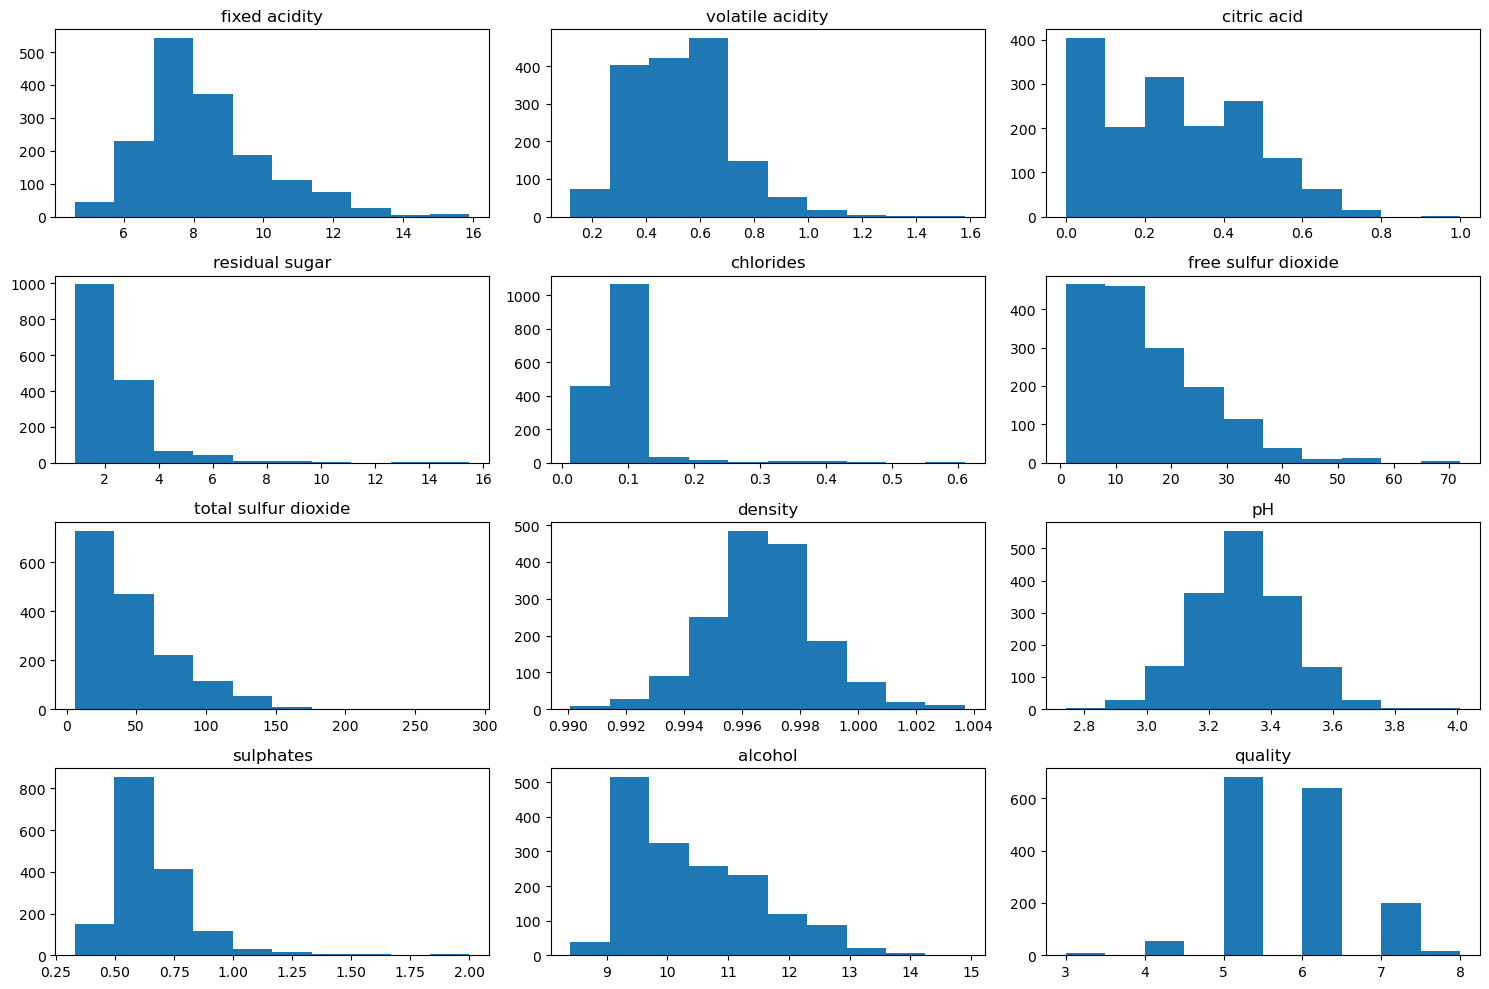

In [25]:
#Desplegamos histogramas para comprobar los cambios en cada característica del producto 
print("\nHistograma de características:")
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()


Diagramas de caja de características:


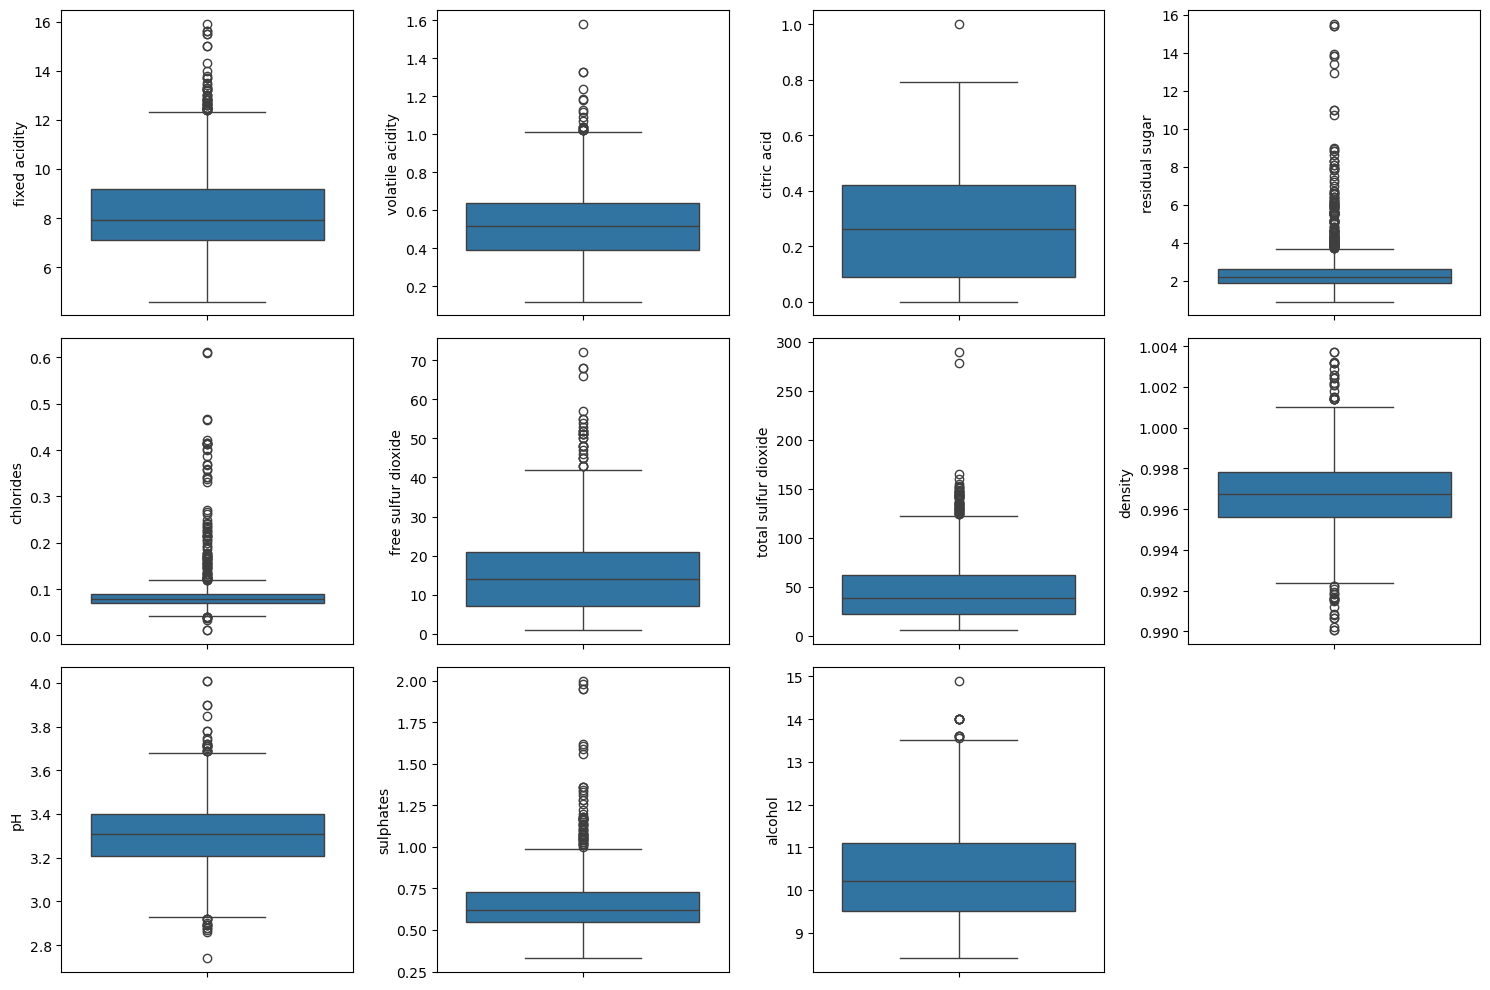

In [27]:
#Desplegamos diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja de características:")
plt.figure(figsize=(15, 10))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()

In [29]:
#Establecemos las columnas a usar como predictores
predictors_col = ["alcohol", "pH", "sulphates", "quality"]
target_col = ['alcohol'] #Estabecemos la columna a usar como objetivo
#Dividimos el  dataset en dos columnas para desarrollar lo anterior
predictors = data[predictors_col]
target = data[target_col]

In [31]:
#Comprobamos los predictors
predictors

,alcohol,pH,sulphates,quality
0,9.4,3.51,0.56,5
1,9.8,3.20,0.68,5
2,9.8,3.26,0.65,5
3,9.8,3.16,0.58,6
4,9.4,3.51,0.56,5
...,...,...,...,...
1594,10.5,3.45,0.58,5
1595,11.2,3.52,0.76,6
1596,11.0,3.42,0.75,6
1597,10.2,3.57,0.71,5


In [33]:
#Comprobamos el objetivo
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [35]:
#Comprobamos las correlaciones entre los datos. Los valores cercanos a 1 indican una alta correlación directa
corr = predictors.corr()
corr

,alcohol,pH,sulphates,quality
alcohol,1.000000,0.205633,0.093595,0.476166
pH,0.205633,1.000000,-0.196648,-0.057731
sulphates,0.093595,-0.196648,1.000000,0.251397
quality,0.476166,-0.057731,0.251397,1.000000


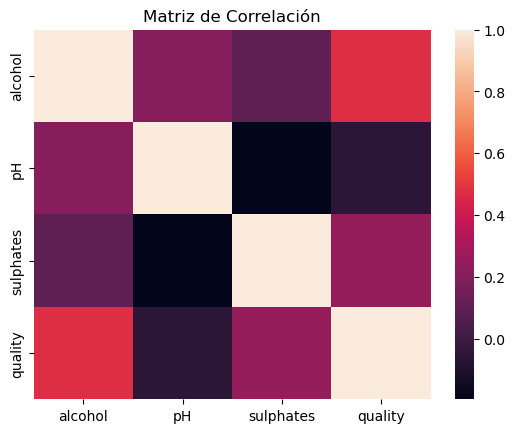

In [37]:
#Comprobamos la matriz de correlación que nos muestra de forma gráfica las correlaciones
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [39]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

#Características a tomar en cuenta:
#Determinamos y predecimos la calidad del vino
X = data.drop('quality', axis=1)  #Característica a evaluar
y = data['quality']  #Objetivo

In [85]:
# Importar el modelo de árbol de decisión desde sklearn
from sklearn.tree import DecisionTreeClassifier

# Asumimos que X e y ya están definidos con los datos
# X: conjunto de características
# y: etiquetas o target que queremos predecir

# Entrenamos el árbol de decisión
tree = DecisionTreeClassifier()
tree.fit(X, y)


DecisionTreeClassifier()

In [87]:
#Obtenemos la relevancia de las características y las ordenamos
feature = pd.DataFrame(tree.feature_importances_,
                                   index=X.columns,
                                   columns=['relevance']).sort_values('relevance', ascending=False)
#Mostramos el resultado
print("Relevancia de las características:")
print(feature)

Relevancia de las características:
                      relevance
alcohol                0.180613
sulphates              0.138050
total sulfur dioxide   0.110338
volatile acidity       0.096559
pH                     0.082746
chlorides              0.077063
residual sugar         0.076643
fixed acidity          0.067888
density                0.059239
free sulfur dioxide    0.058777
citric acid            0.052086


In [92]:
# Obtenemos las importancias de las características y las almacenamos en un DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Relevance': tree.feature_importances_
})

# Verificamos la estructura de feature_importances
print(feature_importances.head())  # Para asegurarnos de que 'Relevance' está correctamente definido

# Seleccionamos las características con importancia mayor a 0.05
selected_features = feature_importances[feature_importances['Relevance'] > 0.05]['Feature'].tolist()

# Mostramos el resultado de la selección
print("\nSelección de Características Relevantes:")
print(selected_features)


            Feature  Relevance
0     fixed acidity   0.067888
1  volatile acidity   0.096559
2       citric acid   0.052086
3    residual sugar   0.076643
4         chlorides   0.077063

Selección de Características Relevantes:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [94]:
# Creamos un DataFrame que almacene las características seleccionadas para el análisis
X_selection = X[selected_features]
print("\nNueva selección:")
print(X_selection.head())



Nueva selección:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4  

In [89]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

[Text(0.4427088404985637, 0.9772727272727273, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1279\nvalue = [8.0, 42.0, 545.0, 510.0, 159.0, 15.0]'),
 Text(0.23514411607186328, 0.9318181818181818, 'x[9] <= 0.575\ngini = 0.507\nsamples = 634\nvalue = [4, 22, 403, 187, 17, 1]'),
 Text(0.3389264782852135, 0.9545454545454546, 'True  '),
 Text(0.09090023857052437, 0.8863636363636364, 'x[10] <= 9.75\ngini = 0.386\nsamples = 273\nvalue = [2.0, 13.0, 208.0, 48.0, 2.0, 0.0]'),
 Text(0.03534738789619748, 0.8409090909090909, 'x[10] <= 9.075\ngini = 0.321\nsamples = 193\nvalue = [2, 10, 157, 23, 1, 0]'),
 Text(0.012464092701689468, 0.7954545454545454, 'x[0] <= 8.15\ngini = 0.708\nsamples = 12\nvalue = [1, 3, 4, 4, 0, 0]'),
 Text(0.006232046350844734, 0.75, 'x[9] <= 0.515\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0, 0]'),
 Text(0.003116023175422367, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.009348069526267102, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nval

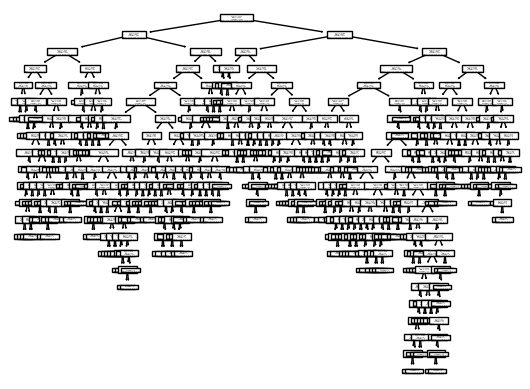

In [96]:
#Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Creamos un arbol de decisión
p_tree = DecisionTreeClassifier()
#Le asignamos las variables de entrenamiento y prueba
tree = p_tree.fit(X_train, y_train)
#Ploteamos el arbol
plot_tree(tree)

In [62]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [97]:
#Inicializamos el modelo de árbol de decisión con hiperparámetros establecidos para mejorar el rendimiento
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4427088404985637, 0.9772727272727273, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1279\nvalue = [8.0, 42.0, 545.0, 510.0, 159.0, 15.0]'),
 Text(0.23514411607186328, 0.9318181818181818, 'x[9] <= 0.575\ngini = 0.507\nsamples = 634\nvalue = [4, 22, 403, 187, 17, 1]'),
 Text(0.3389264782852135, 0.9545454545454546, 'True  '),
 Text(0.09090023857052437, 0.8863636363636364, 'x[10] <= 9.75\ngini = 0.386\nsamples = 273\nvalue = [2.0, 13.0, 208.0, 48.0, 2.0, 0.0]'),
 Text(0.03534738789619748, 0.8409090909090909, 'x[10] <= 9.075\ngini = 0.321\nsamples = 193\nvalue = [2, 10, 157, 23, 1, 0]'),
 Text(0.012464092701689468, 0.7954545454545454, 'x[0] <= 8.15\ngini = 0.708\nsamples = 12\nvalue = [1, 3, 4, 4, 0, 0]'),
 Text(0.006232046350844734, 0.75, 'x[9] <= 0.515\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0, 0]'),
 Text(0.003116023175422367, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.009348069526267102, 0.7045454545454546, 'gini = 0.0\nsamples = 3\nval

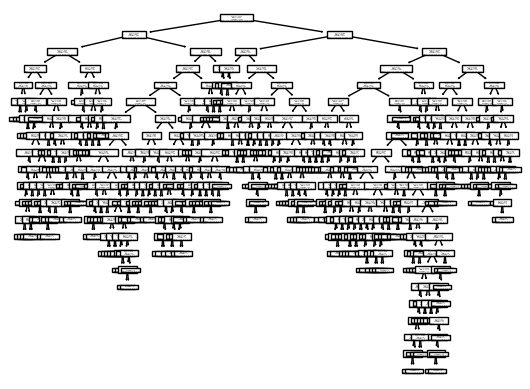

In [98]:
#Ploteamos el arbol
plot_tree(tree)

In [114]:
# Establecemos las predicciones usando el conjunto de prueba
pred = tree.predict(X_test)

# Mostramos las predicciones
print("Predicciones del modelo:")
print(pred)


Predicciones del modelo:
[7 6 4 6 5 7 6 5 6 8 4 6 5 6 5 6 6 5 7 7 6 6 5 6 5 6 5 7 6 5 5 5 6 6 7 5 5
 7 5 5 6 5 6 6 6 7 7 6 5 5 5 7 5 5 8 5 4 5 5 6 6 6 6 5 6 5 6 5 5 6 6 6 6 5
 5 6 7 6 5 5 5 6 5 6 5 5 6 6 7 7 5 5 6 7 5 5 5 5 6 4 8 6 7 7 6 6 8 7 7 6 5
 5 5 5 6 6 4 5 7 7 7 6 4 5 6 7 7 5 6 7 5 5 5 7 7 6 5 5 5 4 5 6 5 5 7 6 5 6
 5 6 7 5 5 6 5 4 5 5 8 6 6 5 5 8 6 7 5 6 5 6 6 5 6 6 6 6 7 5 7 6 7 5 6 6 5
 6 6 5 6 7 6 6 5 6 5 8 5 5 5 5 7 5 6 6 5 6 5 5 7 6 5 6 5 6 7 3 5 5 7 6 6 4
 5 5 5 7 6 7 7 6 6 5 7 7 5 7 5 7 6 5 5 5 5 6 5 5 7 6 6 6 6 5 6 5 5 6 5 6 6
 6 6 6 7 5 6 6 6 6 5 6 4 6 6 6 5 6 6 5 6 5 6 5 5 6 7 6 6 6 6 5 5 7 5 6 5 6
 5 5 5 7 5 4 5 4 5 6 5 5 7 6 6 6 6 6 5 6 5 6 7 5]


In [102]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [116]:
#Realizamos predicciones en el conjunto seleccionado para la prueba
y_pred = tree_2.predict(X_test)
#Calculamos métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#Mostramos lo resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5125
Recall: 0.5125
F1 Score: 0.4938823064809176


In [185]:
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

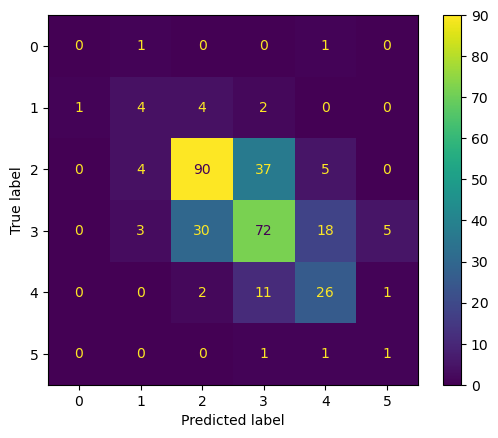

In [118]:
#Mostramos resultados en una matriz de confusión
cm = confusion_matrix(y_test, pred)
#Dibujamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()   

In [124]:
from sklearn.metrics import accuracy_score

# Comprobamos la precisión
accuracy = accuracy_score(y_test, pred)  # Usa 'pred' en lugar de 'predicciones'
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.603125


In [187]:
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [ ]:
#Análisis de resultados
# Una precisión del 60.31% en mi modelo de clasificación significa que está haciendo predicciones 
# correctas para aproximadamente el 60% de las instancias en el conjunto de prueba.
# 
# 1. **Rendimiento Moderado**: 
#    Para mí, una precisión del 60.31% es moderada. Dependiendo del contexto de mi problema, 
#    esto podría ser aceptable o no. En tareas simples, podría estar bien, 
#    pero en situaciones más críticas, como diagnósticos médicos o detección de fraude, 
#    definitivamente necesito un rendimiento más alto.
# 
# 2. **Balance de Clases**:
#    Debo considerar el balance de clases en mis datos. Si una clase es mucho más común que otra, 
#    la precisión puede ser engañosa. Por ejemplo, si el 70% de mis datos pertenecen a una clase, 
#    un modelo que siempre predice esa clase podría obtener una precisión del 70%, 
#    pero eso no sería útil en la práctica. En este caso, quiero mirar otras métricas, 
#    como recall, precision o F1-score.
# 
# 3. **Evaluación Adicional**:
#    Planeo hacer una evaluación más exhaustiva de mi modelo. Considero que usar una matriz 
#    de confusión me ayudará a ver cuántas instancias de cada clase se clasificaron 
#    correctamente o incorrectamente. También puedo explorar la curva ROC y AUC 
#    para evaluar el rendimiento del modelo en diferentes umbrales de clasificación. 
#    La validación cruzada sería otra buena estrategia para obtener una mejor estimación 
#    de la precisión en diferentes particiones de mis datos.
# 
# 4. **Posibles Mejoras**:
#    Si la precisión no es lo que esperaba, puedo considerar algunas mejoras. 
#    Por ejemplo, podría ajustar los hiperparámetros de mi modelo usando técnicas como 
#    GridSearchCV o RandomizedSearchCV. También me gustaría explorar la ingeniería 
#    de características, ya que mejorar las características de entrada podría ayudar 
#    a mejorar el rendimiento. Además, tal vez deba probar modelos alternativos, 
#    como Random Forest o SVM, que podrían manejar mejor la complejidad de mis datos.
# 
# En resumen, aunque una precisión del 60.31% es un punto de partida para evaluar mi modelo, 
# sé que necesito profundizar en el análisis del rendimiento y considerar mejoras. 
# La interpretación de estos resultados siempre debe hacerse en el contexto de mi 
# problema específico y con un entendimiento claro de los datos con los que estoy trabajando.
